In [72]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Number of weekly updates releases: 27 

Total number of sent emails: 97682
Total number of opened emails: 6527
Total percentage: 6.681886120267808 % 

Total number of people reached : 3684
Total number of people who have opened the email at least once: 1064
Total percentage: 28.881650380021718 % 



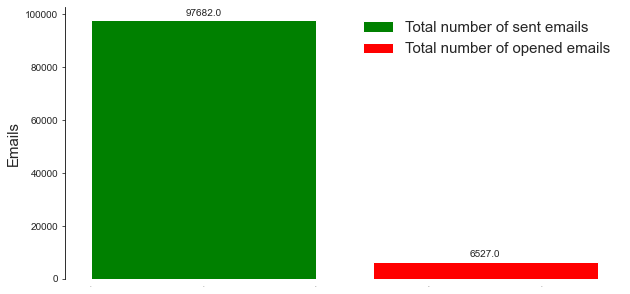

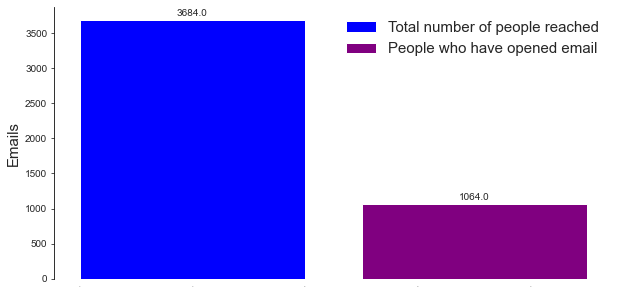

The following chart shows the number of people who have opened our emails at least once: 



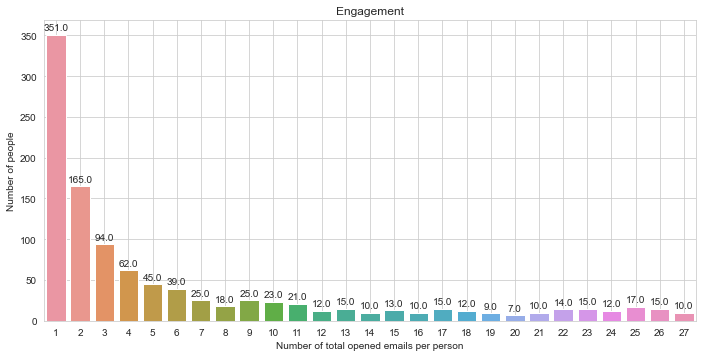

The following chart shows how many people have opened the email per release: 



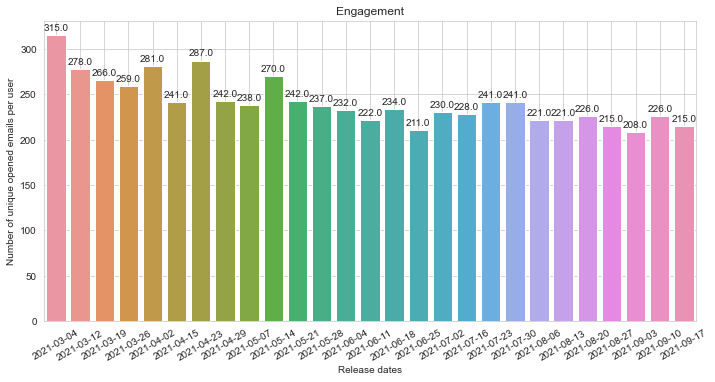

The same information presented in a histogram: 



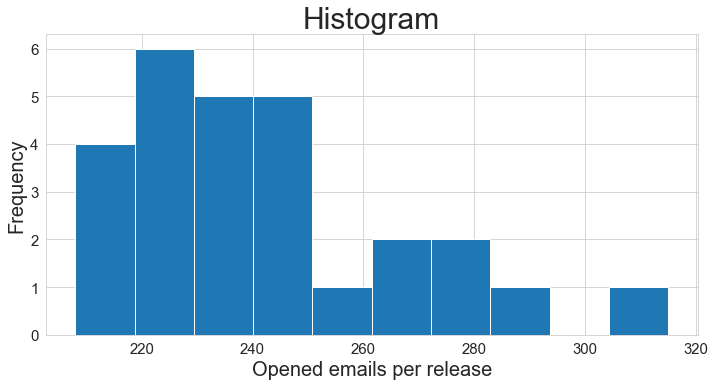

In [73]:
## import the document and rename dataframe
df= pd.read_csv('ACT-ON_EXTERNAL.csv')
## Make remove the time of the sent date and only get the date 
date= df['Sent Date/Time']
date= df.loc[df['Sent Date/Time'].notnull(), 'Sent Date/Time Index'] = df['Sent Date/Time'].str[:10]
## Add the new column at the end of the dataframe with the name 'date'
df['date']= date
## Create a list of the unique dates that we have in the file being 1 date = 1 release 
s = []
for i in date:
    if i not in s:
        s.append(i)

## Get the number of different people we have sent the email to and put the unique values in a list called p 
people= df['E-mail Address']
p = []
for i in people:
    if i not in p:
        p.append(i)
## Print the numnber of releases we have in the file and the total number of emails sent 
print('Number of weekly updates releases:',len(s), '\n')
print('Total number of sent emails:',len(df))

## Remove all the rows where the column 'Open Count' is NAN or blank
df1= df.dropna(subset=['Open Count'])
## Get the total number of emails/people who have opened our emails at least once 
readers= df1['E-mail Address']
r = []
for i in readers:
    if i not in r:
        r.append(i)
## Print the different results we obtained and their percentages
print('Total number of opened emails:',df1['Open Count'].count())
print('Total percentage:', df1['Open Count'].count()/len(df)*100,'%','\n')
print('Total number of people reached :',len(p))
print('Total number of people who have opened the email at least once:',len(r))
print('Total percentage:', len(r)/len(p)*100,'%' ,'\n')

## Use this results to create a new dataframe to plot the info 
ch= {'Total number of sent emails':[len(df)], 'Total number of opened emails': [df1['Open Count'].count()], 
     'Total number of people reached': [len(p)], 'People who have opened the email at least once': [len(r)] }
cha= pd.DataFrame(data= ch)

## Plot the first chart
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(cha))
width = 0.20
plt.bar(x-0.2, cha['Total number of sent emails'], width, color='green', label='Total number of sent emails')
plt.bar(x+0.05, cha['Total number of opened emails'], width, color='red', label='Total number of opened emails')
plt.title(None)
plt.xlabel(None)
plt.ylabel('Emails', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=0)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
## add the values per bar 
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
    xytext=(0, 7), textcoords='offset points')
for _,s in ax.spines.items():
    s.set_color('black')

## Plot the second chart 
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(cha))
width = 0.20
plt.bar(x-0.2, cha['Total number of people reached'], width, color='blue', label='Total number of people reached')
plt.bar(x+0.05, cha['People who have opened the email at least once'], 
        width, color='purple', label='People who have opened email')
plt.title(None)
plt.xlabel(None)
plt.ylabel('Emails', fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=0)
sns.despine(bottom=True)
ax.grid(False)
ax.tick_params(bottom=False, left=True)
plt.legend(frameon=False, fontsize=15)
## add the values per bar 
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
    xytext=(0, 7), textcoords='offset points')
for _,s in ax.spines.items():
    s.set_color('black')

## Show the bar charts
plt.show()    
    
## Create a pivot table to see the number of times each email has opened a release 
pivot = pd.pivot_table(data=df1, index= 'E-mail Address', values='Open Count', aggfunc= np.count_nonzero)
pivot= pivot.reset_index()

## Create a new pivot of the pivot to get the number of people per specific number of opened emails
pivot1 = pd.pivot_table(data=pivot, index= 'Open Count', values='E-mail Address', aggfunc= np.count_nonzero)
pivot1= pivot1.reset_index()

print('The following chart shows the number of people who have opened our emails at least once:', '\n')
# Chart to show the engagemnt of the people we have in the distribution list
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(pivot1))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
ax = sns.barplot(x='Open Count', y='E-mail Address', data= pivot1)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
plt.title('Engagement')
plt.xlabel('Number of total opened emails per person')
plt.ylabel('Number of people')
ax.grid(True)

## Show the bar charts
plt.show()

## Get the total amount of people who opened the email per release
pivot2 = pd.pivot_table(data=df1, index= 'date', values='Open Count', aggfunc= np.count_nonzero)
pivot2= pivot2.reset_index()

print('The following chart shows how many people have opened the email per release:', '\n')

# Chart to show the number of people who opened the email per release
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(pivot2))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
ax = sns.barplot(x='date', y='Open Count', data= pivot2)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 7), textcoords='offset points')
plt.title('Engagement')
plt.xlabel('Release dates')
plt.xticks(fontsize=10, rotation=30)
plt.ylabel('Number of unique opened emails per user')
ax.grid(True)
# Show histogram
plt.show()

print('The same information presented in a histogram:', '\n')
# Same information but in a histogram
hist= pivot2['Open Count']
fig, ax = plt.subplots(figsize=(10,5))
x = np.arange(len(hist))
fig.tight_layout(pad=2)
sns.set_style('whitegrid')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Histogram', fontsize=30)

# Plot histogram
p= plt.hist(hist)
plt.xlabel('Opened emails per release', fontsize= 20)
plt.ylabel('Frequency', fontsize= 20)


# Show histogram
plt.show()
